**기본 세팅**

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family='NanumGothic') # 폰트 설정
mpl.rc('axes', unicode_minus=False) # 유니코드에서 음수 부호 설정

# 차트 스타일 설정
sns.set(font="NanumGothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc("figure", figsize=(10,8))

warnings.filterwarnings("ignore")

# 5. DBSCAN

**DBSCAN(Density Based Spatial Clustering of Applications with Noise)**

DBSCAN은 대표적인 밀도 기반 군집화 알고리즘이다.

특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어 복잡한 기하학적 분포를 가진 데이터에도 군집화를 잘 수행한다.

**DBSCAN 주요 파라미터**

- 입실론 주변 영역(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역


- 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 갯수

**DBSCAN 데이터 포인트**

각 개별 데이터 포인트는 역할에 따라 다음과 같이 정의 가능하다.

- 핵심 포인트(core point): 주변 영역 내에 최소 데이터 갯수 이상의 타 데이터를 가지고 있는 경우


- 이웃 포인트(neighbor point): 주변 영역 내에 위치한 타 데이터를 명칭


- 경계 포인트(border point): 핵심 포인트는 아니지만 핵심 포인트를 이웃 포인트로 가지는 데이터


- 잡음 포인트(noise point): 핵심 포인트가 아니면서 동시에 경계 포인트도 아닌 데이터

만약 핵심 포인트끼리 서로가 이웃 포인트라면 서로를 연결하면서 군집화를 구성한다.

경계 포인트의 경우 핵심 포인트의 이웃 포인트로서 군집의 외곽을 형성한다.

즉, 입실론 주변 영역의 최소 데이터 갯수를 포함하는 밀도 기준을 충족시키는 데이터인 핵심 포인트를 연결하면서 군집화를 한다.

## 5.1 IRIS 데이터

**군집분석 시각화 함수**

In [3]:
# GMM에서 사용한 시각화 함수
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    
    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_
    
    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)
    
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]
        
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)
        
        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
            
    if isNoise:
        legend_loc='upper center'
    else: 
        legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [4]:
from sklearn.datasets import load_iris

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

iris_df = pd.DataFrame(iris.data, columns = feature_names)
iris_df["target"] = iris.target

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.cluster import DBSCAN

# dbscan
dbscan = DBSCAN(eps = 0.6, min_samples = 8, metric = "euclidean")
dbscan_labels = dbscan.fit_predict(iris.data)

# cluster label 추가
iris_df["dbscan_cluster"] = dbscan_labels

iris_df.groupby(["target", "dbscan_cluster"]).size()

target  dbscan_cluster
0       -1                 1
         0                49
1       -1                 4
         1                46
2       -1                 8
         1                42
dtype: int64

- `sklearn.cluster()`의 `DBSCAN()`을 이용해서 DBSCAN을 수행 가능하다.


- `eps`는 입실론 주변 영역, `min_samples`는 최소 데이터 개수이다.


- 결과를 보면 -1,0,1 값이 있는데 -1은 노이즈에 속하는 군집을 의미한다.


- 즉, 여기선 0과1 2개의 군집과 노이즈로 군집화 하였다.

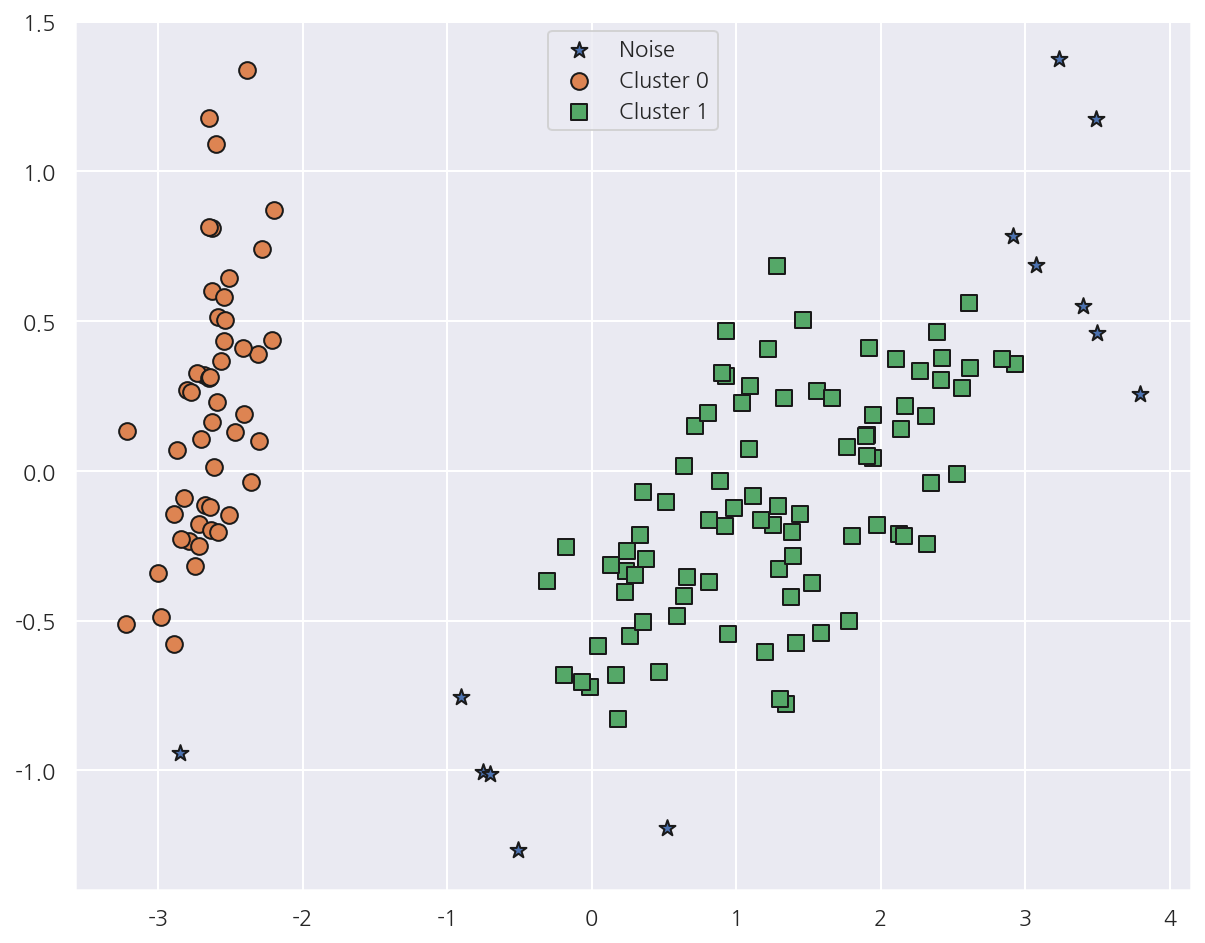

In [6]:
from sklearn.decomposition import PCA

# pca로 피처 2개만 사용
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)

# 데이터 프레임에 주성분 추가
iris_df["ftr1"] = pca_transformed[:,0]
iris_df["ftr2"] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, iris_df, "dbscan_cluster", iscenter=False)

- PCA로 2차원으로 차원 축소 후, DBSCAN 군집분석 결과를 시각화 하였다.


- 일반적으로 `eps`의 값을 크게 하면 반경이 커져 포함하는 데이터가 많아지므로 노이즈 갯수가 감소한다.


- `min_samples`를 크게 하면 주어진 반경 내에서 더 많은 데이터를 포함해야므로 노이즈 갯수가 증가한다.


- `eps`와 `min_samples`를 조정하면서 노이즈 갯수를 확인해보자.

target  dbscan_cluster
0        0                50
1        1                50
2       -1                 3
         1                47
dtype: int64


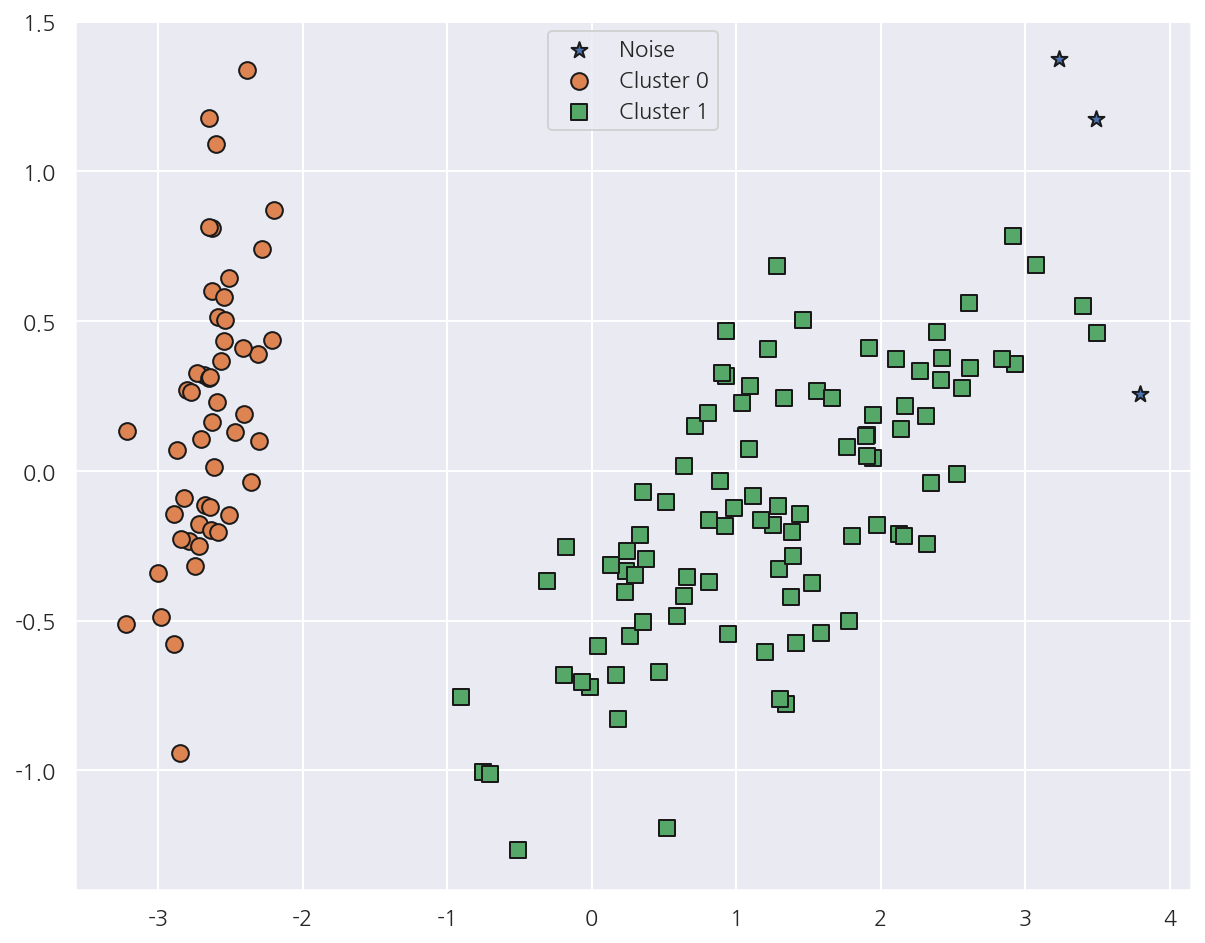

In [7]:
# eps 0.6 -> 0.8
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(["target", "dbscan_cluster"]).size()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

- `eps`를 0.6에서 0.8로 증가하였더니 -1값이 줄어들었고 그림으로도 노이즈가 감소한 것이 확인 된다.

target  dbscan_cluster
0       -1                 2
         0                48
1       -1                 6
         1                44
2       -1                14
         1                36
dtype: int64


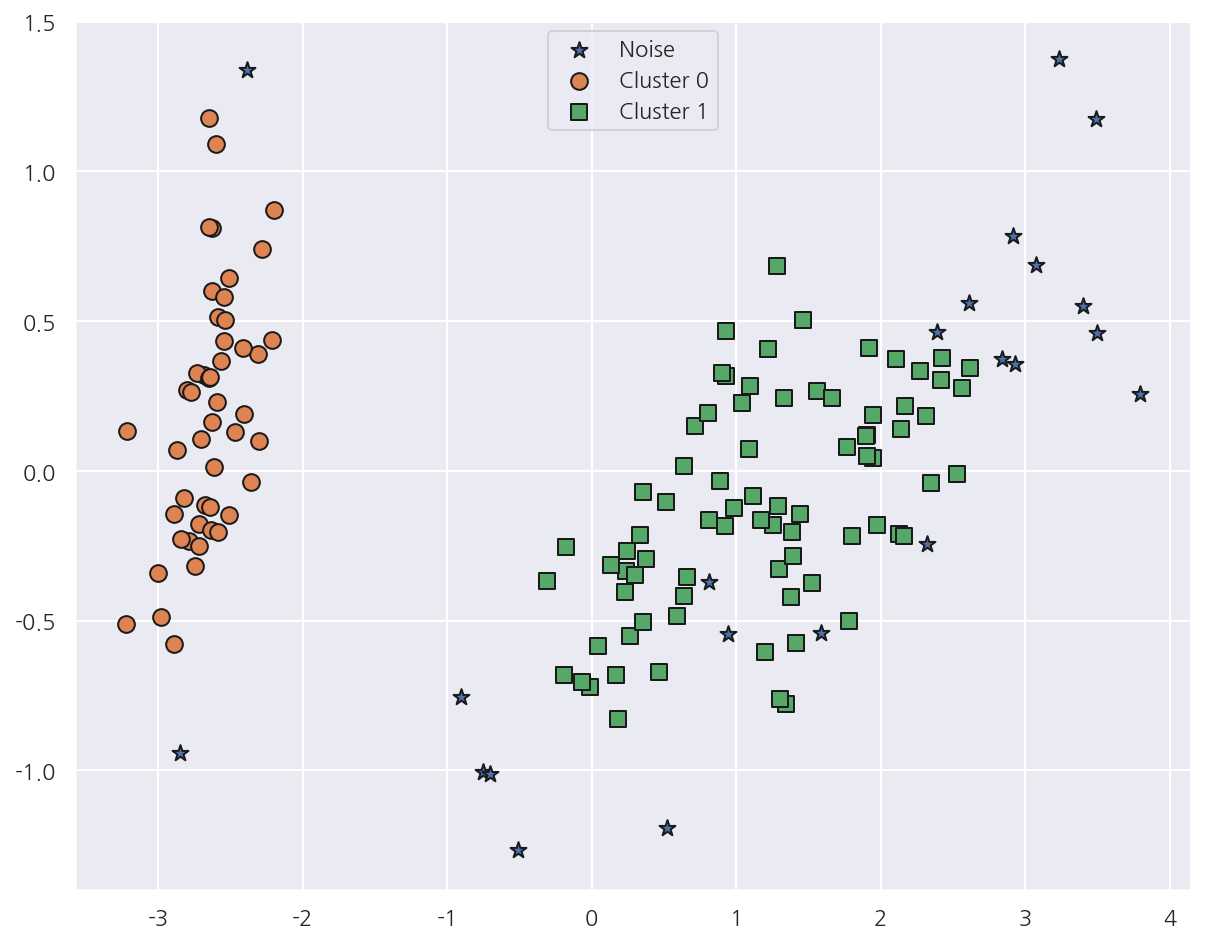

In [8]:
# min_samples: 8 -> 16
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

iris_df['dbscan_cluster'] = dbscan_labels
iris_df['target'] = iris.target

iris_result = iris_df.groupby(["target", "dbscan_cluster"]).size()
print(iris_result)

visualize_cluster_plot(dbscan, iris_df, 'dbscan_cluster', iscenter=False)

- `min_samples`를 8에서 16으로 증가하였더니 -1값이 늘어났고 그림으로도 노이즈가 증가한 것이 확인 된다.

## 5.2 가상데이터

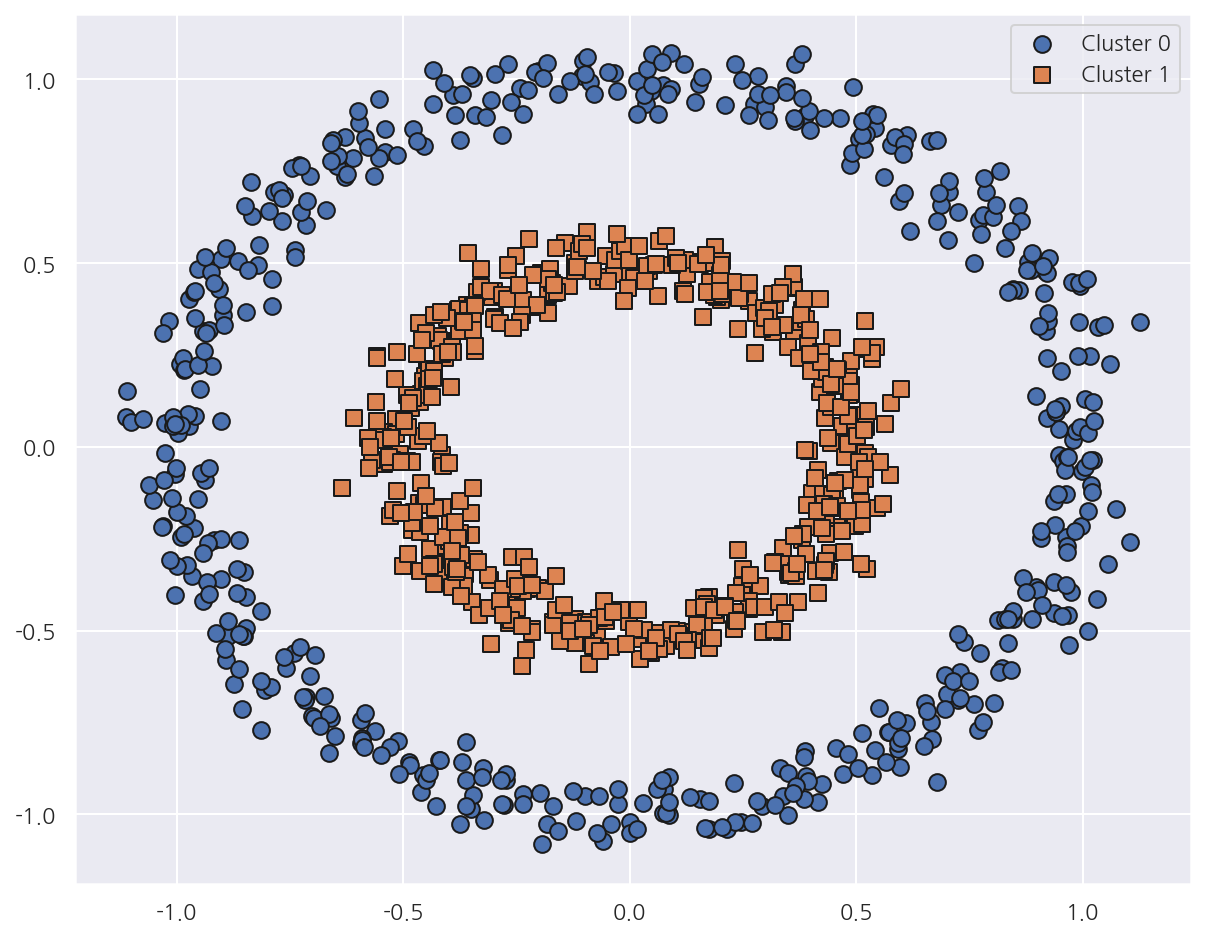

In [9]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

# 가상데이터 시각화
visualize_cluster_plot(None, cluster_df, 'target', iscenter=False)

- `make_circles()`은 중심 기반 군집화로 해결하기 어려운 데이터를 생성하며 2개의 피처만을 가진다.


- `noise`는 노이즈 데이터의 비율을 의미한다.


- `factor`는 외부 원과 내부 원의 scale 비율을 의미한다.


- 이 데이터를 이용해서 K-Means, GMM, DBSCAN을 적용해보자.

### 5.2.1 K-Means

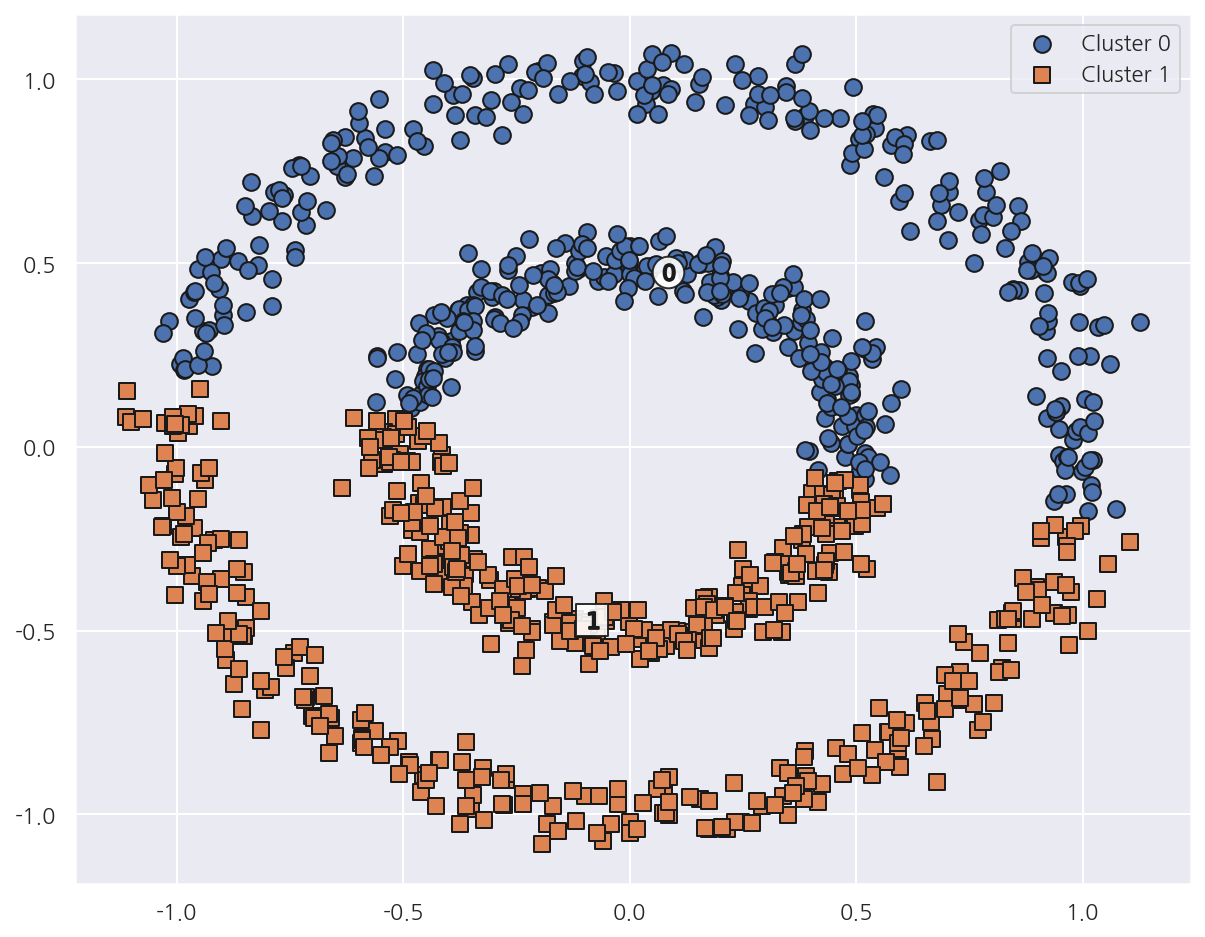

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)

cluster_df["kmeans_cluster"] = kmeans_labels

visualize_cluster_plot(kmeans, cluster_df, 'kmeans_cluster', iscenter=True)

- K-Means는 위, 아래 군집 중심을 기반으로 위와 아래 절반으로 군집화 하였다.


- 거리 기반 군집화로는 데이터가 특정한 형태로 지속해서 이어지는 부분을 찾아내기 어렵다.

### 5.2.2 GMM

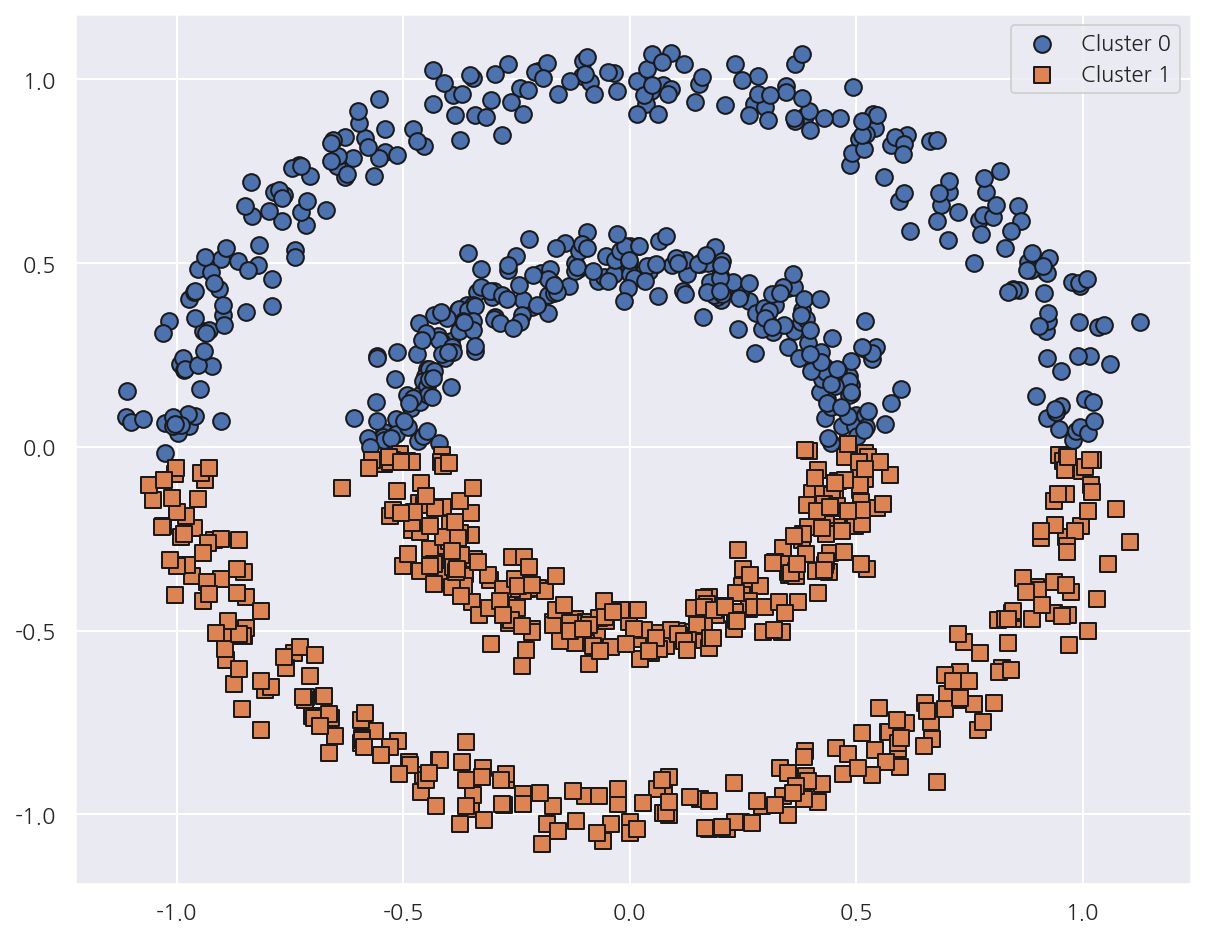

In [11]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(X)

cluster_df["gmm_cluster"] = gmm_labels

visualize_cluster_plot(gmm, cluster_df, 'gmm_cluster', iscenter=False)

- GMM 역시 복잡한 형태의 데이터에 대해선 군집화가 원하는 방향으로 되지 않았다.

### 5.2.3 DBSCAN

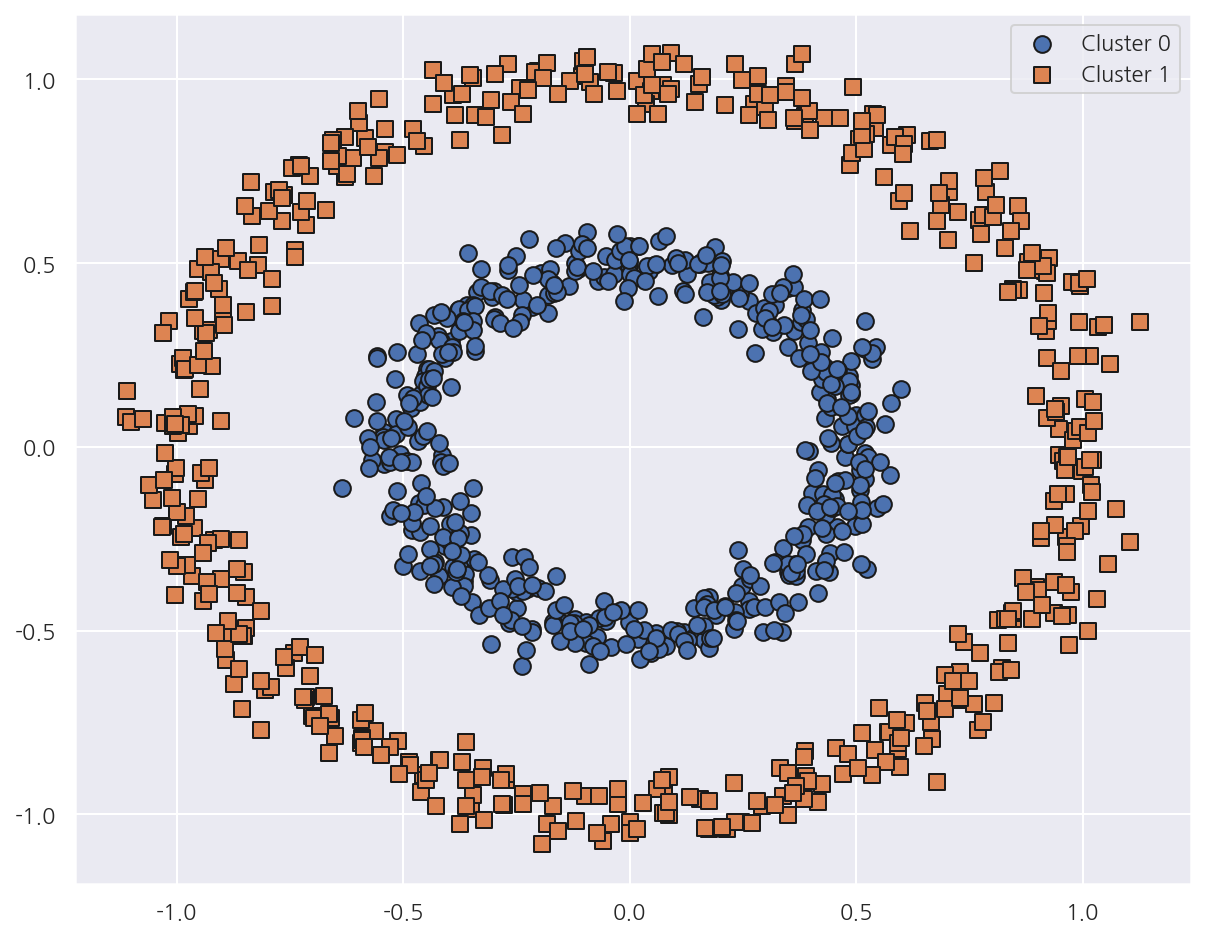

In [12]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric="euclidean")
dbscan_labels = dbscan.fit_predict(X)

cluster_df["dbscan_cluster"] = dbscan_labels

visualize_cluster_plot(dbscan, cluster_df, 'dbscan_cluster', iscenter=False)

- DBSCAN은 원하는 방향으로 정확하게 군집화가 되었다.